In [1]:
pip install wordcloud

In [2]:
import pandas as pd 
import nltk 
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Baki
[nltk_data]     Akgun\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
data = pd.read_csv("Music Informations and Lyrics_ from Spotify and Musixmatch.csv")
df = data.copy()

In [5]:
def getting_primary_info(df):
    print("------------------------------------------------------")
    print("Veri setinin şekli", df.shape)
    print("------------------------------------------------------")
    print("Veri seti değişken tipleri:\n", df.dtypes)
    print("------------------------------------------------------")
    print("Veri setinin ilk 5 satırı")
    display(HTML(df.head(1).to_html()))
    print("------------------------------------------------------")
    print("Veri setinin istatistiki verileri")
    description = df.describe()
    display(HTML(description.to_html()))
    print("------------------------------------------------------")  
getting_primary_info(df)

------------------------------------------------------
Veri setinin şekli (904, 47)
------------------------------------------------------
Veri seti değişken tipleri:
 Track Name                   object
Artist                       object
Artist Popularity             int64
Artist Genres                object
Track Duration(ms)            int64
Release Date                 object
Track Popularity              int64
Danceability                float64
Energy                      float64
Key                           int64
Loudness                    float64
Mode                          int64
Speechiness                 float64
Acousticness                float64
Instrumentalness            float64
Liveness                    float64
Valence                     float64
Tempo                       float64
Time_signature                int64
Lyrics                       object
Average1                    float64
Average2                    float64
Average3                    float64
Aver

,Track Name,Artist,Artist Popularity,Artist Genres,Track Duration(ms),Release Date,Track Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time_signature,Lyrics,Average1,Average2,Average3,Average4,Average5,Varience1,Varience2,Varience3,Varience4,Varience5,Standard Deviation1,Standard Deviation2,Standard Deviation3,Standard Deviation4,Standard Deviation5,Minimum1,Minimum2,Minimum3,Minimum4,Minimum5,Maximum1,Maximum2,Maximum3,Maximum4,Maximum5,Track Popularity Output,Artist Popularity Output
0,(It Goes Like) Nanana - Edit,Peggy Gou,69,"electra, float house",231545,2023-06-15,88,0.671,0.876,7,-5.681,0,0.0352,0.12,0.188,0.0823,0.964,129.998,4,"I can't explain, I got a feeling that I just\nI can't erase, just a feeling that I won't\nWon't leave behind, because it's something that is on\nIt's on my mind, I guess it goes, like na-na-na\n\nNa-na-na-na-na, na-na-na-na-na\nNa-na-na-na-na, na-na-na-na-na\nNa-na-na-na-na, na-na-na-na-na\nNa-na-na-na-na, na-na-na-na\n\nI can't explain, I got a feeling that I just\nI can't erase, just a feeling that I won't\nWon't leave behind, because it's something that is on\n...\n",37.987656,64.04562,53.018883,55.546474,48.07736,896.67065,10256.972,4503.1455,2841.6868,1369.5983,29.94446,101.27671,67.105484,53.307472,37.008083,0.577062,0.785647,0.216221,0.653582,0.141339,742.7894,1846.2258,1477.1046,1063.335,430.29745,88.0,69.0


------------------------------------------------------
Veri setinin istatistiki verileri


,Artist Popularity,Track Duration(ms),Track Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time_signature,Average1,Average2,Average3,Average4,Average5,Varience1,Varience2,Varience3,Varience4,Varience5,Standard Deviation1,Standard Deviation2,Standard Deviation3,Standard Deviation4,Standard Deviation5,Minimum1,Minimum2,Minimum3,Minimum4,Minimum5,Maximum1,Maximum2,Maximum3,Maximum4,Maximum5,Track Popularity Output,Artist Popularity Output
count,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,1.0,1.0
mean,75.868363,208839.594027,72.174779,0.640319,0.623329,5.001106,-6.803680,0.634956,0.087048,0.246058,0.018078,0.168348,0.480155,120.691965,3.943584,43.428235,65.692663,51.698194,46.484731,45.572712,2962.943456,5444.273067,1850.737193,1169.318907,1029.154188,43.166554,66.209459,40.121064,32.078877,29.969773,0.365620,0.522514,0.457315,0.432776,0.425050,973.829853,1286.529207,617.324469,427.786796,353.564881,88.0,69.0
std,13.306729,47071.473163,18.774420,0.146626,0.182104,3.647083,2.712849,0.481709,0.089085,0.267570,0.090874,0.126038,0.231247,28.409335,0.308827,16.981406,23.757226,17.673412,16.237938,16.398672,5757.724841,5314.147540,1405.379437,894.820466,852.496171,33.178453,32.584583,15.533974,11.849891,11.450413,0.237534,0.336863,0.298251,0.284120,0.273747,1229.729703,1075.967305,395.530585,245.450477,212.955386,NaN,NaN
min,22.000000,91554.000000,0.000000,0.122000,0.056200,0.000000,-18.439000,0.000000,0.022700,0.000013,0.000000,0.026400,0.037100,65.043000,1.000000,4.545511,7.296055,6.800367,5.603150,5.361346,11.016589,13.864113,15.576575,15.259653,13.017994,3.319125,3.723454,3.946717,3.906361,3.608046,0.014903,0.019420,0.004535,0.014653,0.010834,19.665888,23.885056,26.444206,32.452553,31.725170,88.0,69.0
25%,68.750000,178358.000000,68.000000,0.545000,0.520750,1.000000,-8.114750,0.000000,0.034400,0.033775,0.000000,0.094300,0.297750,98.033000,4.000000,31.499464,49.355560,40.932981,36.080891,35.167122,546.624500,1827.478500,868.598050,585.477905,485.406260,23.379820,42.749013,29.471965,24.196621,22.031930,0.185413,0.262106,0.235695,0.218222,0.231561,273.068365,562.533200,353.097078,261.952430,220.306553,88.0,69.0
50%,78.000000,205803.000000,77.000000,0.648500,0.640500,5.000000,-6.255500,1.000000,0.048350,0.136000,0.000002,0.120000,0.465000,120.002000,4.000000,43.187970,67.151600,52.127990,46.362690,45.348249,1174.903950,3959.191000,1506.779500,988.811270,872.788300,34.276829,62.922102,38.817259,31.445369,29.542980,0.315305,0.450183,0.399626,0.380539,0.370951,604.887600,1050.317850,528.557035,380.641220,315.425050,88.0,69.0
75%,86.000000,233384.000000,84.000000,0.746000,0.758000,8.000000,-4.940000,1.000000,0.091950,0.372000,0.000161,0.193000,0.650000,140.020250,4.000000,53.188298,81.388901,62.835940,56.539981,55.207882,2637.499325,7366.187725,2450.489875,1502.415825,1338.767350,51.356209,85.826408,49.502352,38.761002,36.589171,0.498381,0.711393,0.623446,0.591941,0.566091,1134.317275,1711.616400,781.470700,528.154603,429.250983,88.0,69.0
max,100.000000,613026.000000,99.000000,0.967000,0.987000,11.000000,-1.385000,1.000000,0.512000,0.978000,0.931000,0.874000,0.972000,205.863000,5.000000,157.331390,174.450500,185.771440,210.183350,227.376430,52007.360000,50866.734000,9599.875000,12345.042000,14273.607000,228.051220,225.536540,97.978950,111.108246,119.472206,1.631338,2.021424,1.775658,2.211527,2.163014,9954.389000,8179.114300,3204.779300,1758.847000,2162.730000,88.0,69.0


------------------------------------------------------


In [6]:
import nltk
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [7]:
df['Lyrics'] = df['Lyrics'].str.lower().replace(r'^\w\s', ' ').replace(r'\n', ' ', regex = True)

In [8]:
def tokenization(txt):
    tokens = nltk.word_tokenize(txt)
    stemming = [stemmer.stem(w) for w in tokens]
    return " ".join(stemming)

In [ ]:

df['Lyrics'] = df['Lyrics'].apply(lambda x: tokenization(x))

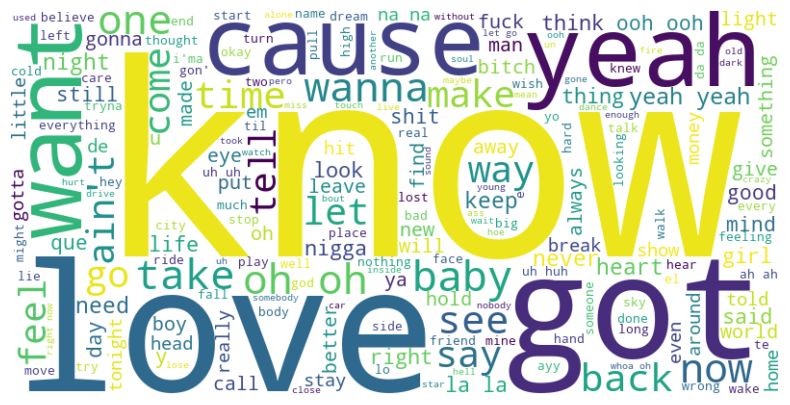

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
lyrics_text = ' '.join(df['Lyrics'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(lyrics_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
tfidvector = TfidfVectorizer(analyzer='word',stop_words='english')
matrix = tfidvector.fit_transform(df['Lyrics'])
similarity = cosine_similarity(matrix)

In [12]:
def recommendation(song_df):
    print(song_df)
    idx = df[df['Track Name'] == song_df].index[0]
    distances = sorted(list(enumerate(similarity[idx])),reverse=True,key=lambda x:x[1])
    
    songs = []
    for m_id in distances:
        song_name = df.iloc[m_id[0]]["Track Name"]
        cosine_similarity = distances[m_id[0]][1]
        songs.append((song_name, cosine_similarity))
        
    return songs

In [13]:
max_popularity_index = df['Track Popularity'].idxmax()

song_with_max_popularity = df.loc[max_popularity_index, 'Track Name']

print("En popüler şarkı:", song_with_max_popularity)

En popüler şarkı: Cruel Summer


In [14]:
recommendations = recommendation("Cruel Summer")

recommendations_df = pd.DataFrame(recommendations, columns=["Track Name", "Cosine Similarity"])

df["Cosine Similarity"] = df["Track Name"].apply(lambda x: recommendations_df[recommendations_df["Track Name"] == x]["Cosine Similarity"].values[0] if x in recommendations_df["Track Name"].values else np.nan)

Cruel Summer


In [15]:
df.head()

,Track Name,Artist,Artist Popularity,Artist Genres,Track Duration(ms),Release Date,Track Popularity,Danceability,Energy,Key,...,Minimum4,Minimum5,Maximum1,Maximum2,Maximum3,Maximum4,Maximum5,Track Popularity Output,Artist Popularity Output,Cosine Similarity
0,(It Goes Like) Nanana - Edit,Peggy Gou,69,"electra, float house",231545,2023-06-15,88,0.671,0.876,7,...,0.653582,0.141339,742.78940,1846.22580,1477.10460,1063.33500,430.29745,88.0,69.0,1.000000
1,02.02.99,That Mexican OT,71,texas latin rap,162162,2024-01-09,76,0.840,0.629,6,...,0.161150,0.606549,470.18580,1975.65170,1346.83120,762.60240,546.28326,NaN,NaN,0.247665
2,1st of Tha Month,Bone Thugs-N-Harmony,65,"gangster rap, hardcore hip hop, hip hop, ohio ...",314680,1995-07-25,69,0.729,0.581,5,...,0.237352,0.340024,547.39190,806.96655,332.66890,205.38692,140.35155,NaN,NaN,0.238483
3,2016,Sam Hunt,68,"contemporary country, country, country pop, mo...",235053,2020-04-03,54,0.520,0.384,6,...,0.728953,0.152565,214.61853,257.36044,226.47835,174.66171,215.21713,NaN,NaN,0.223133
4,23,Chayce Beckham,61,modern country pop,228144,2021-05-14,82,0.626,0.583,0,...,0.660076,0.377560,185.25354,1338.29640,768.20624,578.84380,364.90048,NaN,NaN,0.217117


In [16]:
sid = SentimentIntensityAnalyzer()

sentiments = []
for review in df['Lyrics']:
    sentiment_score = sid.polarity_scores(review)
    sentiments.append(sentiment_score)

sentiments_df = pd.DataFrame(sentiments)
df = pd.concat([df, sentiments_df], axis=1)

In [17]:
df.drop(['Track Popularity Output','Artist Popularity Output'], axis=1, inplace=True)

In [18]:
len(df["Artist"].unique())

510

In [19]:
def ms_to_min(milliseconds):
    minutes = milliseconds / (1000 * 60)
    return minutes
    
df['Track Duration(dk)'] = df['Track Duration(ms)'].apply(lambda x: ms_to_min(x))

In [20]:
df.drop(columns = "Track Duration(ms)",inplace = True)

In [21]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# numeric_columns = df.select_dtypes(include=['number'])

# # Cross-correlation matrisini hesaplayalım
# correlation_matrix = numeric_columns.corr()
# correlation_matrix

In [22]:
def custom_mean(group):
    return group.mean()

rolling_avg = df.groupby('Artist')['Energy'].rolling(window=2).apply(custom_mean, raw=False)

# Hesaplanan kayan ortalamayı yeni bir sütun olarak DataFrame'e ekleyelim
df['rolling_avg_energy'] = rolling_avg.reset_index(level=0, drop=True).values
df['rolling_avg_energy'] = df['rolling_avg_energy'].fillna(df['Energy'])

In [23]:
df['Year'] = 2024 - df['Release Date'].str[:4].astype(int)

In [24]:
df.drop(columns = "Release Date" , inplace = True)

In [25]:
general_genres = [
    "Pop",
    "Rock",
    "Hip Hop",
    "R&B",
    "Jazz",
    "Electronic",
    "Country",
    "Reggae",
    "Folk",
    "Classical",
    "Blues",
    "Metal",
    "Indie",
    "Punk",
    "Funk",
    "Disco",
    "Alternative",
    "Soul",
    "Gospel",
    "Dance",
    "Latin",
    "World",
    "Experimental",
    "Ambient",
    "Acoustic",
    "Instrumental"
]
df = df.dropna(subset=['Artist Genres'])
for genre in general_genres:
    df[genre] = df['Artist Genres'].apply(lambda x: 1 if genre.lower() in x.lower() else 0)



In [26]:
df.drop(columns = "Artist Genres",inplace = True)

In [27]:
df.to_csv("deneme.csv" , index = False)

In [28]:
import pandas as pd 
df = pd.read_csv("Music Informations and Lyrics_ from Spotify and Musixmatch.csv")

In [29]:
dff =  pd.read_csv("deneme.csv")

In [30]:
dff.head()

,Track Name,Artist,Artist Popularity,Track Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,...,Alternative,Soul,Gospel,Dance,Latin,World,Experimental,Ambient,Acoustic,Instrumental
0,(It Goes Like) Nanana - Edit,Peggy Gou,69,88,0.671,0.876,7,-5.681,0,0.0352,...,0,0,0,0,0,0,0,0,0,0
1,02.02.99,That Mexican OT,71,76,0.840,0.629,6,-6.629,0,0.2910,...,0,0,0,0,1,0,0,0,0,0
2,1st of Tha Month,Bone Thugs-N-Harmony,65,69,0.729,0.581,5,-8.235,0,0.1800,...,0,0,0,0,0,0,0,0,0,0
3,2016,Sam Hunt,68,54,0.520,0.384,6,-8.168,1,0.0362,...,0,0,0,0,0,0,0,0,0,0
4,23,Chayce Beckham,61,82,0.626,0.583,0,-7.346,0,0.0318,...,0,0,0,0,0,0,0,0,0,0


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

X , y = dff.drop(columns=["Artist Popularity", "Track Popularity", "Artist", "Track Name", "Lyrics"]), dff["Artist Popularity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Linear Regression Test R^2 Score:", r2)

y_pred_train = model.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
print("Linear Regression Train R^2 Score:", r2_train)

print("------------------------")

# Random Forest
model_random_forest = RandomForestRegressor(n_estimators=20, min_samples_split=2)
model_random_forest.fit(X_train, y_train)

y_pred_rf = model_random_forest.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Test R^2 Score:", r2_rf)

y_pred_rf_train = model_random_forest.predict(X_train)
r2_rf_train = r2_score(y_train, y_pred_rf_train)
print("Random Forest Train R^2 Score:", r2_rf_train)

print("------------------------")

# Gradient Boosting
model_gradient_boosting = GradientBoostingRegressor(n_estimators=80, min_samples_split=2)
model_gradient_boosting.fit(X_train, y_train)

y_pred_gb = model_gradient_boosting.predict(X_test)
r2_gb = r2_score(y_test, y_pred_gb)
print("Gradient Boosting Test R^2 Score:", r2_gb)

y_pred_gb_train = model_gradient_boosting.predict(X_train)
r2_gb_train = r2_score(y_train, y_pred_gb_train)
print("Gradient Boosting Train R^2 Score:", r2_gb_train)


Linear Regression Test R^2 Score: 0.22869949447971372
Linear Regression Train R^2 Score: 0.40352235332501174
------------------------
Random Forest Test R^2 Score: 0.18733096127146953
Random Forest Train R^2 Score: 0.8978323740515428
------------------------
Gradient Boosting Test R^2 Score: 0.2977105848852125
Gradient Boosting Train R^2 Score: 0.7179555979966388


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

X , y = dff.drop(columns=["Artist Popularity", "Track Popularity", "Artist", "Track Name",  "Lyrics"]), dff["Track Popularity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Linear Regression Test R^2 Score:", r2)

y_pred_train = model.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
print("Linear Regression Train R^2 Score:", r2_train)

print("------------------------")

# Random Forest
model_random_forest = RandomForestRegressor(n_estimators=20, min_samples_split=2)
model_random_forest.fit(X_train, y_train)

y_pred_rf = model_random_forest.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Test R^2 Score:", r2_rf)

y_pred_rf_train = model_random_forest.predict(X_train)
r2_rf_train = r2_score(y_train, y_pred_rf_train)
print("Random Forest Train R^2 Score:", r2_rf_train)

print("------------------------")

# Gradient Boosting
model_gradient_boosting = GradientBoostingRegressor(n_estimators=80, min_samples_split=2)
model_gradient_boosting.fit(X_train, y_train)

y_pred_gb = model_gradient_boosting.predict(X_test)
r2_gb = r2_score(y_test, y_pred_gb)
print("Gradient Boosting Test R^2 Score:", r2_gb)

y_pred_gb_train = model_gradient_boosting.predict(X_train)
r2_gb_train = r2_score(y_train, y_pred_gb_train)
print("Gradient Boosting Train R^2 Score:", r2_gb_train)


Linear Regression Test R^2 Score: -0.004736234241620618
Linear Regression Train R^2 Score: 0.12041317109817606
------------------------
Random Forest Test R^2 Score: -0.06278395775217427
Random Forest Train R^2 Score: 0.8334549272057615
------------------------
Gradient Boosting Test R^2 Score: -0.06242119545300895
Gradient Boosting Train R^2 Score: 0.6140375190317379
